# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [238]:
import pandas as pd
import requests
import json
from api_keys import weather_api_key
import matplotlib.pyplot as plt
import textwrap
from scipy.stats import linregress
import scipy.stats as st

# imports csv from citipy API
cities_data_df = pd.read_csv('worldcities.csv')
cities_data_df.head()

,Country,City,Latitude,Longitude
0,ad,andorra la vella,42.500000,1.516667
1,ad,canillo,42.566667,1.600000
2,ad,encamp,42.533333,1.583333
3,ad,la massana,42.550000,1.516667
4,ad,les escaldes,42.500000,1.533333


## Generate Cities List

In [239]:
cities = cities_data_df['City']

city_list_index = []

# appends a city index to city_list every 72 iterations
for city_index in range(len(cities)):
    if city_index % 72 == 0:
        city_list_index.append(city_index)

# converts city index to corresponding city name
city_list = cities_data_df['City'][city_list_index]
city_list = city_list.tolist()

# converts city_list to df
city_list_df = pd.DataFrame(city_list)
city_list_df.columns = ['City']

# adds new columns to df
city_list_df['Lat'] = ''
city_list_df['Lng'] = ''
city_list_df['Max Temp(F)'] = ''
city_list_df['Humidity(%)'] = ''
city_list_df['Cloudiness(%)'] = ''
city_list_df['Wind Speed(MPH)'] = ''
city_list_df['Country'] = ''
city_list_df['Date'] = ''
city_list_df.head()

,City,Lat,Lng,Max Temp(F),Humidity(%),Cloudiness(%),Wind Speed(MPH),Country,Date
0,andorra la vella,,,,,,,,
1,old road,,,,,,,,
2,agarakadzor,,,,,,,,
3,berd,,,,,,,,
4,lanjaghbyur,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [240]:
# iterates through df rows
for index, row in city_list_df.iterrows():
    city_name = row['City']
    unit_measure = 'imperial'
    api_key = weather_api_key
    base_url = f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&units={unit_measure}&appid={api_key}'
    
    city_weather = requests.get(base_url).json()
    
    # checks weather info for each city in df but doesn't break out of loop if there's a KeyError due to no city in API
    try:
        city_list_df.loc[index, 'Lat'] = city_weather['coord']['lat']
        city_list_df.loc[index, 'Lng'] = city_weather['coord']['lon']
        city_list_df.loc[index, 'Max Temp(F)'] = city_weather['main']['temp_max']
        city_list_df.loc[index, 'Humidity(%)'] = city_weather['main']['humidity']
        city_list_df.loc[index, 'Cloudiness(%)'] = city_weather['clouds']['all']
        city_list_df.loc[index, 'Wind Speed(MPH)'] = city_weather['wind']['speed']
        city_list_df.loc[index, 'Country'] = city_weather['sys']['country']
        city_list_df.loc[index, 'Date'] = city_weather['dt']
        print(f'{index} {city_name}')
    except KeyError:
        print(f'{index} {city_name} is not in the database')

0 andorra la vella
1 old road is not in the database
2 agarakadzor
3 berd
4 lanjaghbyur
5 shahumyan
6 nieuwpoort
7 mercedes
8 berndorf
9 knittelfeld
10 sankt veit
11 biloela
12 kempsey
13 sunbury
14 puta
15 coralici
16 mionica
17 travnik
18 jhikargachha is not in the database
19 as is not in the database
20 chastre
21 gembloux
22 kaprijke
23 merelbeke
24 retie
25 virton
26 kokologo
27 dve mogili
28 omurtag
29 veliki preslav
30 caracollo
31 santa barbara
32 altinopolis
33 araripe
34 barra velha
35 boquira
36 camacari
37 caraguatatuba
38 cianorte
39 cruzilia
40 exu
41 guajara
42 iguaba grande
43 itajuba
44 jacarei
45 juruti
46 manaquiri
47 miguelopolis
48 nao-me-toque is not in the database
49 ouro branco
50 patu
51 piraquara
52 presidente prudente
53 rio novo do sul
54 santa rita do sapucai
55 sao joao de pirabas
56 sarandi
57 taperoa
58 tupanatinga
59 vicosa
60 kobojango is not in the database
61 pinsk
62 blackfalds
63 claresholm
64 fenelon falls
65 humboldt
66 louisbourg is not in the

561 tursunzoda
562 tabarqah is not in the database
563 canta
564 iskilip
565 patnos
566 penal
567 tainan
568 itumba
569 mahanje
570 mwanga
571 usoke
572 bolhrad
573 dovbysh
574 kalush
575 krasnodon
576 makoshyne
577 novomyrhorod
578 pidhaytsi
579 sarny
580 stebnyk
581 velyka oleksandrivka
582 zamhlay is not in the database
583 kisoro
584 madison
585 mesa
586 altadena
587 coalinga
588 grass valley
589 madera
590 placentia
591 santa rosa
592 windsor
593 coventry
594 new castle
595 forest city
596 miami beach
597 saint petersburg
598 centerville
599 thomasville
600 beach park
601 godfrey
602 palatine
603 bloomington
604 washington
605 newton
606 jefferson
607 old orchard beach
608 glen burnie
609 bedford
610 mansfield
611 walpole
612 hazel park
613 blaine
614 saint peter
615 creve coeur
616 great falls
617 farmington
618 bound brook
619 marlton
620 wanaque
621 cheektowaga
622 mastic
623 syosset
624 morganton
625 chillicothe
626 newark
627 willowick
628 hayesville
629 hermitage
630 ciales


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [241]:
# drops rows that contains a city not in the API database
city_list_df = city_list_df[city_list_df.Lat != '']
city_list_df.reset_index(drop=True, inplace=True)

# exports data to a csv file
city_list_df.to_csv("City_List.csv")

city_list_df

,City,Lat,Lng,Max Temp(F),Humidity(%),Cloudiness(%),Wind Speed(MPH),Country,Date
0,andorra la vella,42.5,1.49,37,76,0,5.06,AD,1602986281
1,agarakadzor,39.73,45.35,48.2,57,0,4.7,AM,1602986281
2,berd,40.88,45.39,54.16,62,0,3.51,AM,1602986281
3,lanjaghbyur,40.27,45.14,44.6,75,0,1.12,AM,1602986282
4,shahumyan,39.94,44.57,44.6,75,0,1.12,AM,1602986282
5,nieuwpoort,51.12,2.77,48.2,100,98,4.7,BE,1602986282
6,mercedes,-34.65,-59.43,68,89,0,1.01,AR,1602986183
7,berndorf,47.95,16.11,46,89,89,3,AT,1602986282
8,knittelfeld,47.22,14.82,42.01,93,40,2.24,AT,1602986283
9,sankt veit,49.1,10.95,44.01,100,90,3.36,DE,1602986283


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [242]:
# checks to see if there are cities with humidity > 100%
over_100 = city_list_df.loc[city_list_df['Humidity(%)'] > 100]
over_100

,City,Lat,Lng,Max Temp(F),Humidity(%),Cloudiness(%),Wind Speed(MPH),Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

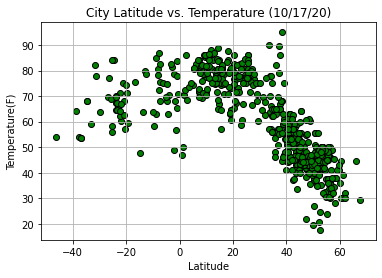

This code graphs the relationship between the city's temperature and its latitude coordinate. The
plot shows that the further away a city is from the prime meridian, the lower the max temperature
will be.


In [243]:
# creates scatter plot
plt.scatter(city_list_df['Lat'], city_list_df['Max Temp(F)'], c='green', edgecolors='black')
plt.title('City Latitude vs. Temperature (10/17/20)')
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.grid()

# saves plot as .png
plt.savefig('Latitude_vs_Temp.png')

plt.show()

# prints discription and analyses
conclusion1 = "This code graphs the relationship between the city's temperature and its latitude coordinate. The plot shows that the further away a city is from the prime meridian, the lower the max temperature will be."
print(textwrap.fill(conclusion1, 100))

## Latitude vs. Humidity Plot

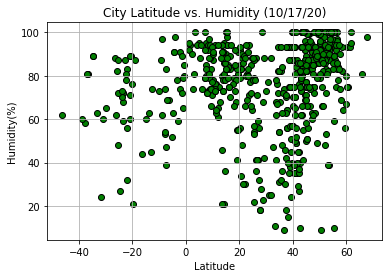

This code graphs the relationship between the city's humidity levels and its latitude coordinate.
Based on the plot, there does not seem to be a direct correlation between the city's distance from
the prime meridian and its humidity levels.


In [244]:
# creates scatter plot
plt.scatter(city_list_df['Lat'], city_list_df['Humidity(%)'], c='green', edgecolors='black')
plt.title('City Latitude vs. Humidity (10/17/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()

# saves plt as .png
plt.savefig('Latitude_vs_Humidity.png')

plt.show()

# prints discription and analyses
conclusion2 = "This code graphs the relationship between the city's humidity levels and its latitude coordinate. Based on the plot, there does not seem to be a direct correlation between the city's distance from the prime meridian and its humidity levels."
print(textwrap.fill(conclusion2, 100))

## Latitude vs. Cloudiness Plot

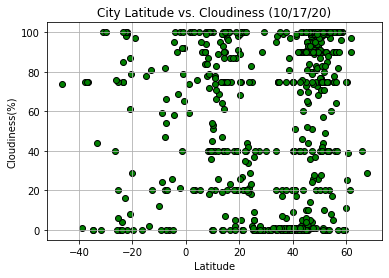

This code graphs the relationship between the city's cloudiness levels and its latitude coordinate.
Based on the plot, there does not seem to be a direct correlation between the city's distance from
the prime meridian and its cloudiness levels.


In [245]:
# creates scatter plot
plt.scatter(city_list_df['Lat'], city_list_df['Cloudiness(%)'], c='green', edgecolors='black')
plt.title('City Latitude vs. Cloudiness (10/17/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()

# saves plt as .png
plt.savefig('Latitude_vs_Cloudiness.png')

plt.show()

# prints discription and analyses
conclusion3 = "This code graphs the relationship between the city's cloudiness levels and its latitude coordinate. Based on the plot, there does not seem to be a direct correlation between the city's distance from the prime meridian and its cloudiness levels."
print(textwrap.fill(conclusion3, 100))

## Latitude vs. Wind Speed Plot

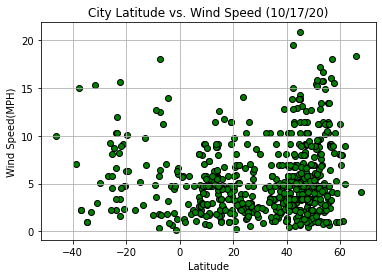

This code graphs the relationship between the city's wind speed and its latitude coordinate. Based
on the plot, there does not seem to be a direct correlation between the city's distance from the
prime meridian and its cloudiness levels.


In [246]:
# creates scatter plot
plt.scatter(city_list_df['Lat'], city_list_df['Wind Speed(MPH)'], c='green', edgecolors='black')
plt.title('City Latitude vs. Wind Speed (10/17/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(MPH)')
plt.grid()

# saves plt as .png
plt.savefig('Latitude_vs_Wind_Speed.png')

plt.show()

# prints discription and analyses
conclusion4 = "This code graphs the relationship between the city's wind speed and its latitude coordinate. Based on the plot, there does not seem to be a direct correlation between the city's distance from the prime meridian and its cloudiness levels."
print(textwrap.fill(conclusion4, 100))

## Linear Regression

In [247]:
# grabs cities with latitude coordinate >= 0
northern_hemi_df = city_list_df.loc[city_list_df['Lat'] >= 0]
northern_hemi_df

,City,Lat,Lng,Max Temp(F),Humidity(%),Cloudiness(%),Wind Speed(MPH),Country,Date
0,andorra la vella,42.5,1.49,37,76,0,5.06,AD,1602986281
1,agarakadzor,39.73,45.35,48.2,57,0,4.7,AM,1602986281
2,berd,40.88,45.39,54.16,62,0,3.51,AM,1602986281
3,lanjaghbyur,40.27,45.14,44.6,75,0,1.12,AM,1602986282
4,shahumyan,39.94,44.57,44.6,75,0,1.12,AM,1602986282
5,nieuwpoort,51.12,2.77,48.2,100,98,4.7,BE,1602986282
7,berndorf,47.95,16.11,46,89,89,3,AT,1602986282
8,knittelfeld,47.22,14.82,42.01,93,40,2.24,AT,1602986283
9,sankt veit,49.1,10.95,44.01,100,90,3.36,DE,1602986283
13,puta,40.3,49.66,59,93,40,6.93,AZ,1602986283


In [248]:
# grabs cities with latitude coordinate < 0
southern_hemi_df = city_list_df.loc[city_list_df['Lat'] < 0]
southern_hemi_df

,City,Lat,Lng,Max Temp(F),Humidity(%),Cloudiness(%),Wind Speed(MPH),Country,Date
6,mercedes,-34.65,-59.43,68,89,0,1.01,AR,1602986183
10,biloela,-24.42,150.5,84.2,27,0,8.72,AU,1602986283
11,kempsey,-31.08,152.83,78.01,60,100,3,AU,1602986283
12,sunbury,-37.58,144.73,54,58,75,14.99,AU,1602986056
27,caracollo,-14.92,-70.66,47.53,60,78,5.17,PE,1602986287
29,altinopolis,-21.03,-47.37,75.2,60,8,9.17,BR,1602986287
30,araripe,-7.21,-40.05,75.34,39,54,12.46,BR,1602986287
31,barra velha,-26.63,-48.68,69.8,88,40,5.82,BR,1602986288
32,boquira,-12.82,-42.73,79.9,45,81,9.8,BR,1602986288
33,camacari,-12.7,-38.32,78.8,74,20,6.93,BR,1602986288


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

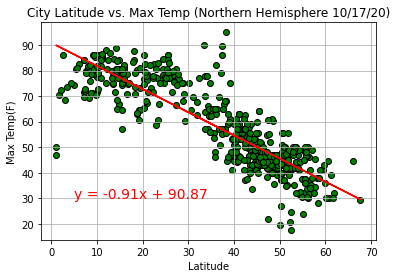

The r-value is: -0.8616604311882599


In [249]:
# creates scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp(F)'], c='green', edgecolors='black')
plt.title('City Latitude vs. Max Temp (Northern Hemisphere 10/17/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp(F)')
plt.grid()

# calculates linear regression
north_lat = northern_hemi_df['Lat']
north_temp = northern_hemi_df['Max Temp(F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat.astype(float), north_temp.astype(float))
N_temp_lat_regress = north_lat * slope + intercept

# plots linear regression over scatter plot
plt.plot(north_lat, N_temp_lat_regress,"r-")

# creates linear equation
line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# annotates linear equation onto scatter plot
plt.annotate(line_eq1,(5,30),fontsize=14,color="red")

# saves plt as .png
plt.savefig('Latitude_vs_Temp(North).png')

plt.show()

# calculates correlation coefficient
N_temp_lat_corr = st.pearsonr(north_lat, north_temp)
print(f'The r-value is: {N_temp_lat_corr[0]}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

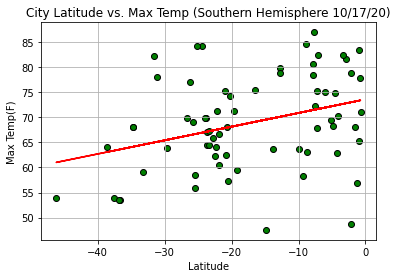

The r-value is: 0.3358303762907916


In [250]:
# creates scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp(F)'], c='green', edgecolors='black')
plt.title('City Latitude vs. Max Temp (Southern Hemisphere 10/17/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp(F)')
plt.grid()

# calculates linear regression
south_lat = southern_hemi_df['Lat']
south_temp = southern_hemi_df['Max Temp(F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat.astype(float), south_temp.astype(float))
S_temp_lat_regress = south_lat * slope + intercept

# plots linear regression over scatter plot
plt.plot(south_lat, S_temp_lat_regress,"r-")

# creates linear equation
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# annotates linear equation onto scatter plot
plt.annotate(line_eq2,(-45,90),fontsize=14,color="red")

# saves plt as .png
plt.savefig('Latitude_vs_Temp(South).png')

plt.show()

# calculates correlation coefficient
S_temp_lat_corr = st.pearsonr(south_lat, south_temp)
print(f'The r-value is: {S_temp_lat_corr[0]}')

In [251]:
# conclusion for max temp vs latitude between north and south
conclusion5 = "Based off both of the plots above, we can conclude that a city's max temperature is strongly correlated to the distance it is from the equator; with the northern hemisphere showing a higher correlation than the south. Essentially, the further away a city is from the equator, the lower its max temperature will be."
print(textwrap.fill(conclusion5, 100))

Based off both of the plots above, we can conclude that a city's max temperature is strongly
correlated to the distance it is from the equator; with the northern hemisphere showing a higher
correlation than the south. Essentially, the further away a city is from the equator, the lower its
max temperature will be.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

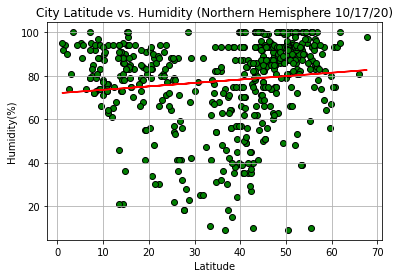

The r-value is: 0.12264641163995017


In [252]:
# creates scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity(%)'], c='green', edgecolors='black')
plt.title('City Latitude vs. Humidity (Northern Hemisphere 10/17/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()

# calculates linear regression
north_lat = northern_hemi_df['Lat']
north_humid = northern_hemi_df['Humidity(%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat.astype(float), north_humid.astype(float))
N_humid_lat_regress = north_lat * slope + intercept

# plots linear regression over scatter plot
plt.plot(north_lat, N_humid_lat_regress,"r-")

# creates linear equation
line_eq3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# annotates linear equation onto scatter plot
plt.annotate(line_eq3,(4,3),fontsize=14,color="red")

# saves plt as .png
plt.savefig('Latitude_vs_Humidity(North).png')

plt.show()

# calculates correlation coefficient
N_humid_lat_corr = st.pearsonr(north_lat, north_humid)
print(f'The r-value is: {N_humid_lat_corr[0]}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

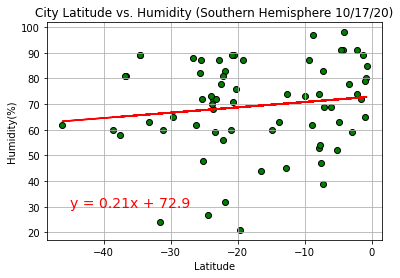

The r-value is: 0.13751733393879326


In [253]:
# creates scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity(%)'], c='green', edgecolors='black')
plt.title('City Latitude vs. Humidity (Southern Hemisphere 10/17/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()

# calculates linear regression
south_lat = southern_hemi_df['Lat']
south_humid = southern_hemi_df['Humidity(%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat.astype(float), south_humid.astype(float))
S_humid_lat_regress = south_lat * slope + intercept

# plots linear regression over scatter plot
plt.plot(south_lat, S_humid_lat_regress,"r-")

# creates linear equation
line_eq4 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# annotates linear equation onto scatter plot
plt.annotate(line_eq4,(-45,30),fontsize=14,color="red")

# saves plt as .png
plt.savefig('Latitude_vs_Humidity(South).png')

plt.show()

# calculates correlation coefficient
S_humid_lat_corr = st.pearsonr(south_lat, south_humid)
print(f'The r-value is: {S_humid_lat_corr[0]}')

In [254]:
# conclusion for humidity vs latitude between north and south
conclusion6 = "Based off the plots above, we can conclude that a city's humidity level is not that correlated to its position from the equator."
print(textwrap.fill(conclusion6, 100))

Based off the plots above, we can conclude that a city's humidity level is not that correlated to
its position from the equator.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

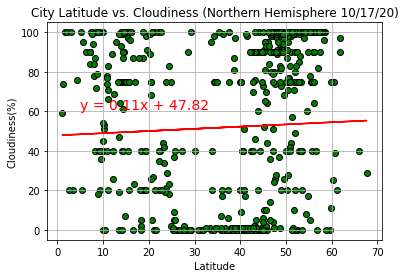

The r-value is: 0.04323506341022727


In [255]:
# creates scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness(%)'], c='green', edgecolors='black')
plt.title('City Latitude vs. Cloudiness (Northern Hemisphere 10/17/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()

# calculates linear regression
north_lat = northern_hemi_df['Lat']
north_cloud = northern_hemi_df['Cloudiness(%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat.astype(float), north_cloud.astype(float))
N_cloud_lat_regress = north_lat * slope + intercept

# plots linear regression over scatter plot
plt.plot(north_lat, N_cloud_lat_regress,"r-")

# creates linear equation
line_eq5 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# annotates linear equation onto scatter plot
plt.annotate(line_eq5,(5,61),fontsize=14,color="red")

# saves plt as .png
plt.savefig('Latitude_vs_Cloudiness(North).png')

plt.show()

# calculates correlation coefficient
N_cloud_lat_corr = st.pearsonr(north_lat, north_cloud)
print(f'The r-value is: {N_cloud_lat_corr[0]}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

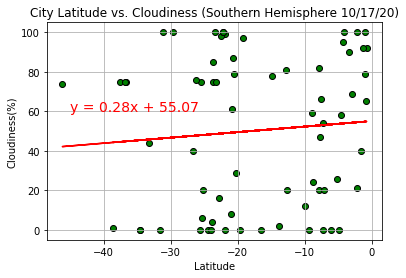

The r-value is: 0.08506317503486102


In [256]:
# creates scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness(%)'], c='green', edgecolors='black')
plt.title('City Latitude vs. Cloudiness (Southern Hemisphere 10/17/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()

# calculates linear regression
south_lat = southern_hemi_df['Lat']
south_cloud = southern_hemi_df['Cloudiness(%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat.astype(float), south_cloud.astype(float))
S_cloud_lat_regress = south_lat * slope + intercept

# plots linear regression over scatter plot
plt.plot(south_lat, S_cloud_lat_regress,"r-")

# creates linear equation
line_eq6 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# annotates linear equation onto scatter plot
plt.annotate(line_eq6,(-45,60),fontsize=14,color="red")

# saves plt as .png
plt.savefig('Latitude_vs_Cloudiness(South).png')

plt.show()

# calculates correlation coefficient
S_cloud_lat_corr = st.pearsonr(south_lat, south_cloud)
print(f'The r-value is: {S_cloud_lat_corr[0]}')

In [257]:
# conclusion for cloudiness vs latitude between north and south
conclusion7 = "Based off the plots above, we can conclude that a city's cloudiness level is not that correlated to its position from the equator."
print(textwrap.fill(conclusion7, 100))

Based off the plots above, we can conclude that a city's cloudiness level is not that correlated to
its position from the equator.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

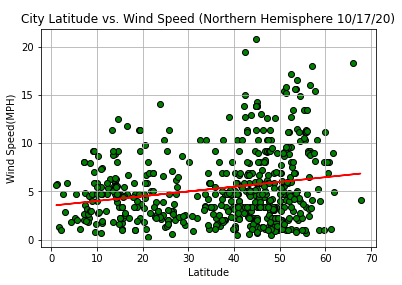

The r-value is: 0.2082564261587807


In [258]:
# creates scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed(MPH)'], c='green', edgecolors='black')
plt.title('City Latitude vs. Wind Speed (Northern Hemisphere 10/17/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(MPH)')
plt.grid()

# calculates linear regression
north_lat = northern_hemi_df['Lat']
north_wind = northern_hemi_df['Wind Speed(MPH)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat.astype(float), north_wind.astype(float))
N_wind_lat_regress = north_lat * slope + intercept

# plots linear regression over scatter plot
plt.plot(north_lat, N_wind_lat_regress,"r-")

# creates linear equation
line_eq7 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# annotates linear equation onto scatter plot
plt.annotate(line_eq7,(5,23),fontsize=14,color="red")

# saves plt as .png
plt.savefig('Latitude_vs_Wind Speed(North).png')

plt.show()

# calculates correlation coefficient
N_wind_lat_corr = st.pearsonr(north_lat, north_wind)
print(f'The r-value is: {N_wind_lat_corr[0]}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

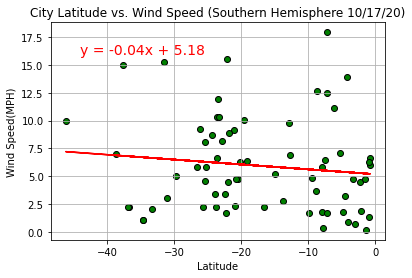

The r-value is: -0.12103070739432946


In [259]:
# creates scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed(MPH)'], c='green', edgecolors='black')
plt.title('City Latitude vs. Wind Speed (Southern Hemisphere 10/17/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(MPH)')
plt.grid()

# calculates linear regression
south_lat = southern_hemi_df['Lat']
south_wind = southern_hemi_df['Wind Speed(MPH)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat.astype(float), south_wind.astype(float))
S_wind_lat_regress = south_lat * slope + intercept

# plots linear regression over scatter plot
plt.plot(south_lat, S_wind_lat_regress,"r-")

# creates linear equation
line_eq8 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# annotates linear equation onto scatter plot
plt.annotate(line_eq8,(-44,16),fontsize=14,color="red")

# saves plt as .png
plt.savefig('Latitude_vs_Wind Speed(South).png')

plt.show()

# calculates correlation coefficient
S_wind_lat_corr = st.pearsonr(south_lat, south_wind)
print(f'The r-value is: {S_wind_lat_corr[0]}')

In [260]:
# conclusion for wind speed vs latitude between north and south
conclusion8 = "Based off the plots above, we can conclude that a city's wind speed is not that correlated to its position from the equator."
print(textwrap.fill(conclusion8, 100))

Based off the plots above, we can conclude that a city's wind speed is not that correlated to its
position from the equator.
